In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')


In [9]:
# 2. Load dataset
df = pd.read_csv("C:/Users/punit/OneDrive/Desktop/ACM-30Days/iris.csv")
print(f"Dataset shape: {df.shape}")
print(df.head())

print("\nColumns in dataset:")
print(df.columns)


Dataset shape: (150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Columns in dataset:
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [11]:
# 3. Detect the target column from common possibilities
possible_targets = ['variety', 'species', 'Species', 'class', 'Class', 'target']

target_col = None
for col in possible_targets:
    if col in df.columns:
        target_col = col
        print(f"Detected target column: '{target_col}'")
        break

if target_col is None:
    raise KeyError("No known target column found! Please check your dataset columns.")

# Display the distribution of the target
print(f"\nTarget '{target_col}' distribution:")
print(df[target_col].value_counts())


Detected target column: 'Species'

Target 'Species' distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [13]:
# 4. Prepare features and scale data
X = df.drop(columns=[target_col])
y = df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


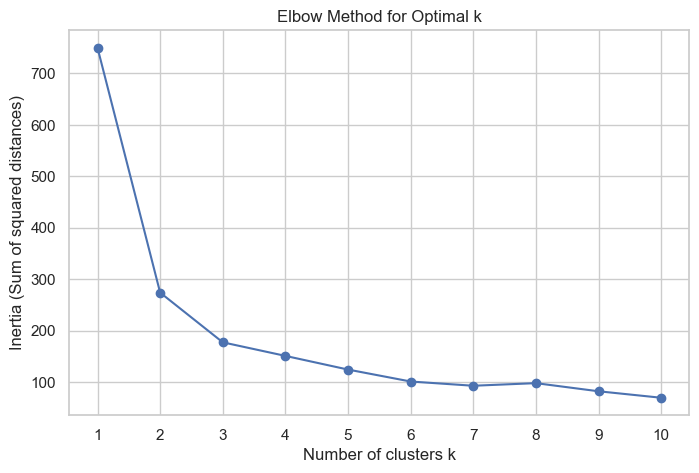

In [15]:
# 5. k-Means Clustering & Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.show()


In [17]:
# 6. Fit k-Means with optimal k (usually 3 for Iris)
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

print(f"k-Means cluster counts:\n{pd.Series(clusters_kmeans).value_counts()}")


k-Means cluster counts:
1    53
2    50
0    47
Name: count, dtype: int64


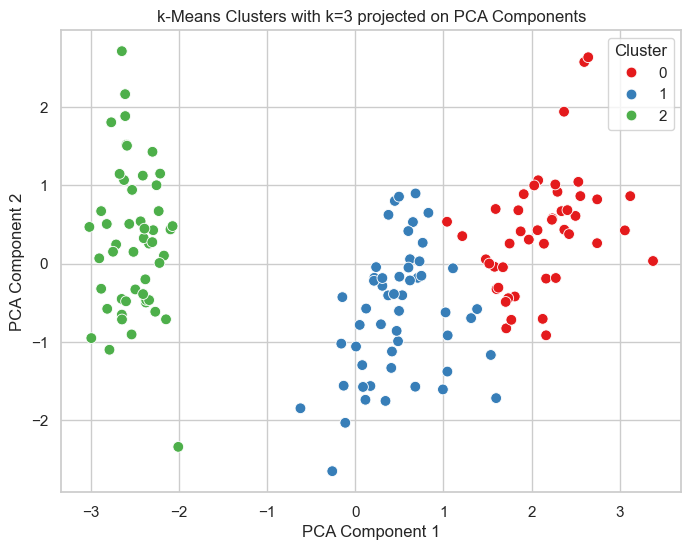

In [19]:
# 7. Visualize k-Means clusters in first two PCA components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_kmeans, palette='Set1', s=60)
plt.title(f'k-Means Clusters with k={k_opt} projected on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


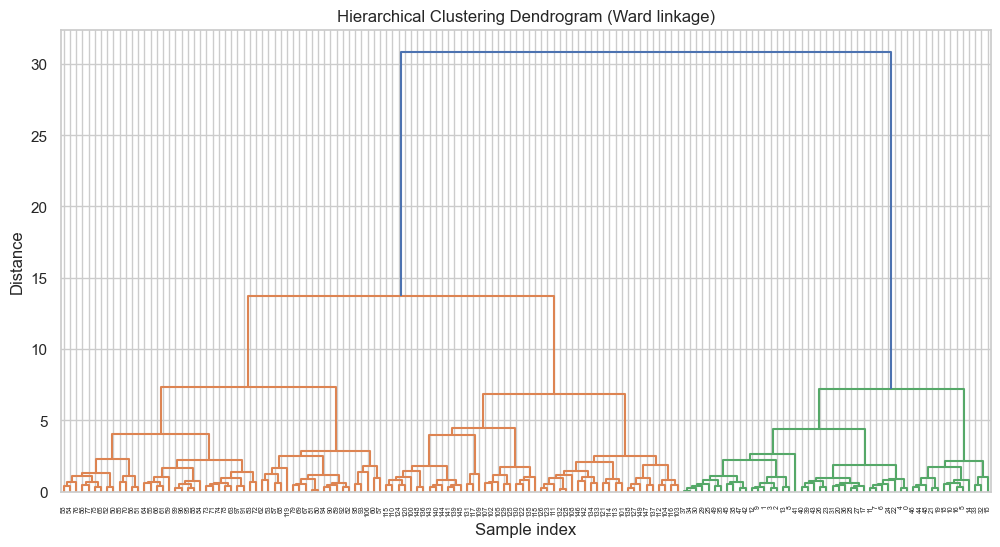

In [21]:
# 8. Hierarchical Clustering and Dendrogram visualization
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [23]:
# 9. Extract clusters from dendrogram with distance cutoff
max_d = 7  # Tune based on dendrogram
clusters_hier = fcluster(linked, t=max_d, criterion='distance')

print(f'Hierarchical clustering cluster counts:\n{pd.Series(clusters_hier).value_counts()}')


Hierarchical clustering cluster counts:
3    48
2    37
5    32
4    20
1    13
Name: count, dtype: int64


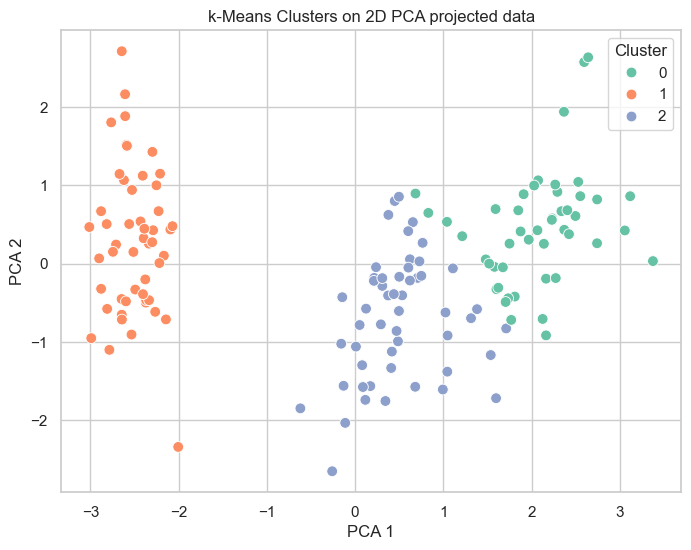

In [25]:
# 10. Bonus: PCA and t-SNE before clustering (k-Means)

# PCA 2D + k-Means
X_pca_2 = PCA(n_components=2).fit_transform(X_scaled)
kmeans_pca = KMeans(n_clusters=k_opt, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca_2)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], hue=clusters_pca, palette='Set2', s=60)
plt.title('k-Means Clusters on 2D PCA projected data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


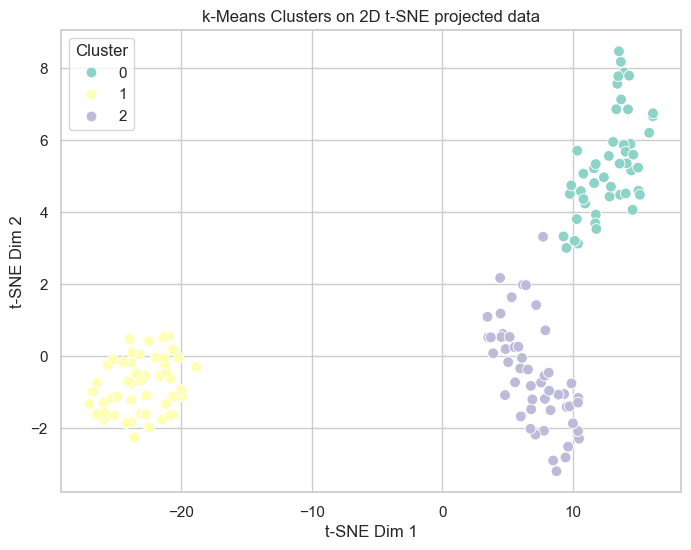

In [27]:
# t-SNE 2D + k-Means
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

kmeans_tsne = KMeans(n_clusters=k_opt, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(X_tsne)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=clusters_tsne, palette='Set3', s=60)
plt.title('k-Means Clusters on 2D t-SNE projected data')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.legend(title='Cluster')
plt.show()
